In [1]:
#import libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [2]:
#Training, Performace evaluation and Ploting
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    trainedforest = RandomForestClassifier(class_weight='balanced').fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
    fpr_rf, tpr_rf, _ = roc_curve(Y_Test, predictionforest)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [7]:
#Reading_data
df = pd.read_excel('Mini_protein_data_Bot_for_ml.xlsx')

In [8]:
#Defining Lables and Features
#Feature Transformations:- Label encoder and Robust Scaler; Feature Extraction; PCA dimention reduction
X = df.drop(['Category','Category_0-1','Category_0-1_2_3_4','Category_0_1-2_3_4'], axis = 1)
Y = df['Category_0-1_2_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y) 
sfm = SelectFromModel(randomforest, prefit=True)
X = sfm.transform(X)

Base Non-Tranformed data
[[ 596  257]
 [ 130 1143]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       853
           1       0.82      0.90      0.86      1273

    accuracy                           0.82      2126
   macro avg       0.82      0.80      0.81      2126
weighted avg       0.82      0.82      0.81      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


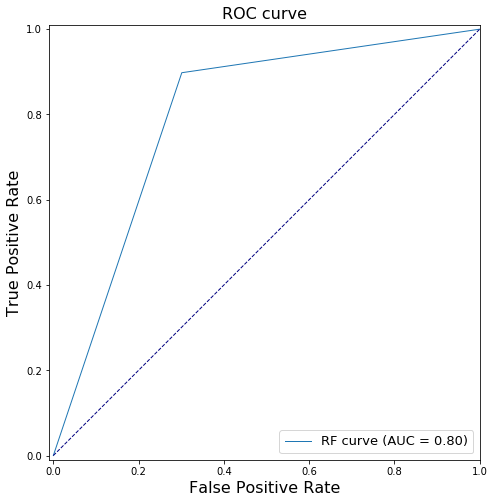

PCA Transformed - 2 dimensions is :-
[18.88930475  7.89154936]
[[499 354]
 [286 987]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       853
           1       0.74      0.78      0.76      1273

    accuracy                           0.70      2126
   macro avg       0.69      0.68      0.68      2126
weighted avg       0.70      0.70      0.70      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


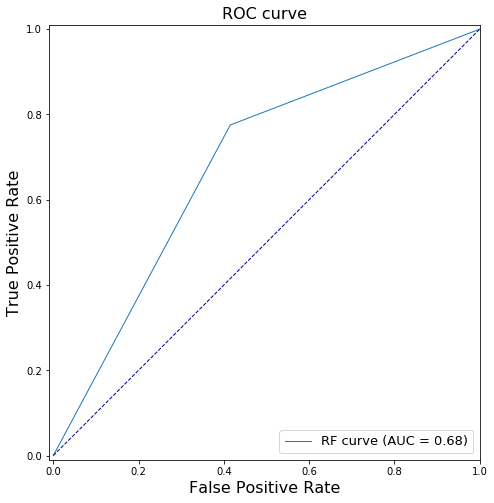

PCA Transformed - 3 dimensions is :-
[18.88930475  7.89154936  5.33986728]
[[ 499  354]
 [ 248 1025]]
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       853
           1       0.74      0.81      0.77      1273

    accuracy                           0.72      2126
   macro avg       0.71      0.70      0.70      2126
weighted avg       0.71      0.72      0.71      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


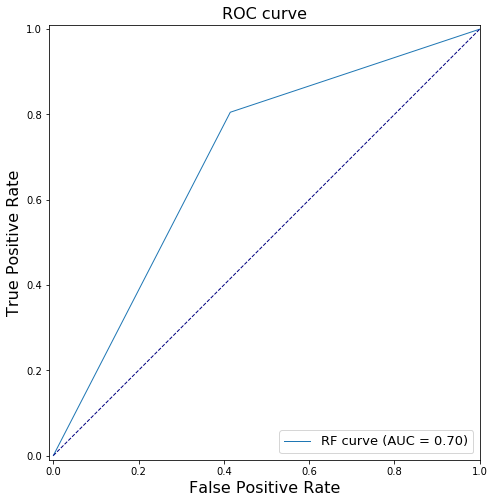

PCA Transformed - 4 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089]
[[ 512  341]
 [ 221 1052]]
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       853
           1       0.76      0.83      0.79      1273

    accuracy                           0.74      2126
   macro avg       0.73      0.71      0.72      2126
weighted avg       0.73      0.74      0.73      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


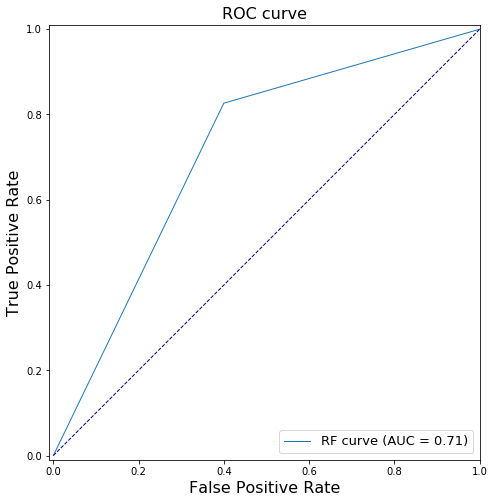

PCA Transformed - 5 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682]
[[ 533  320]
 [ 203 1070]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       853
           1       0.77      0.84      0.80      1273

    accuracy                           0.75      2126
   macro avg       0.75      0.73      0.74      2126
weighted avg       0.75      0.75      0.75      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


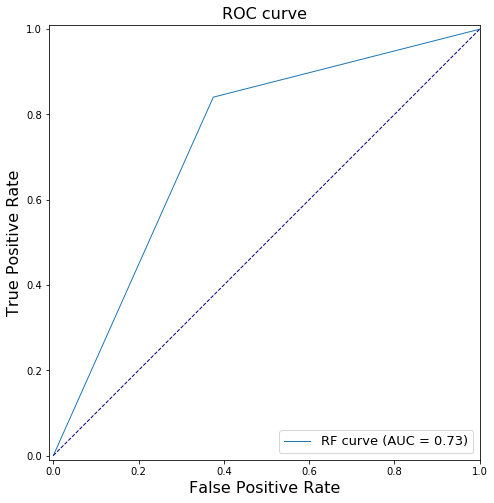

PCA Transformed - 6 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546]
[[ 521  332]
 [ 168 1105]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       853
           1       0.77      0.87      0.82      1273

    accuracy                           0.76      2126
   macro avg       0.76      0.74      0.75      2126
weighted avg       0.76      0.76      0.76      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


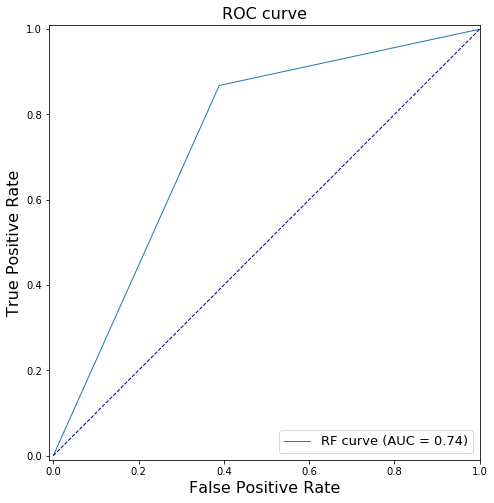

PCA Transformed - 7 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437 ]
[[ 539  314]
 [ 169 1104]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.77      2126
   macro avg       0.77      0.75      0.76      2126
weighted avg       0.77      0.77      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


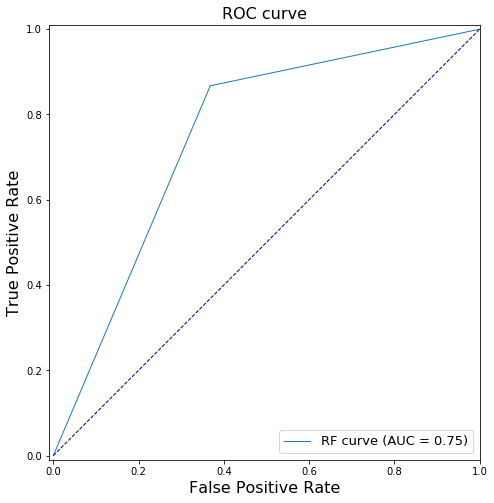

PCA Transformed - 8 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711]
[[ 541  312]
 [ 147 1126]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       853
           1       0.78      0.88      0.83      1273

    accuracy                           0.78      2126
   macro avg       0.78      0.76      0.77      2126
weighted avg       0.78      0.78      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


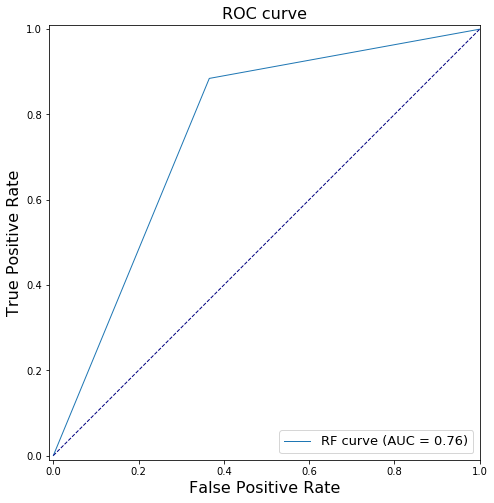

PCA Transformed - 9 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208]
[[ 542  311]
 [ 163 1110]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.77      0.75      0.76      2126
weighted avg       0.78      0.78      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


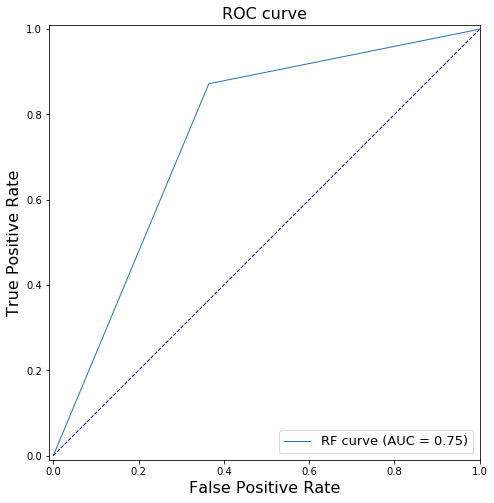

PCA Transformed - 10 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152 ]
[[ 545  308]
 [ 163 1110]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.78      0.76      0.76      2126
weighted avg       0.78      0.78      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


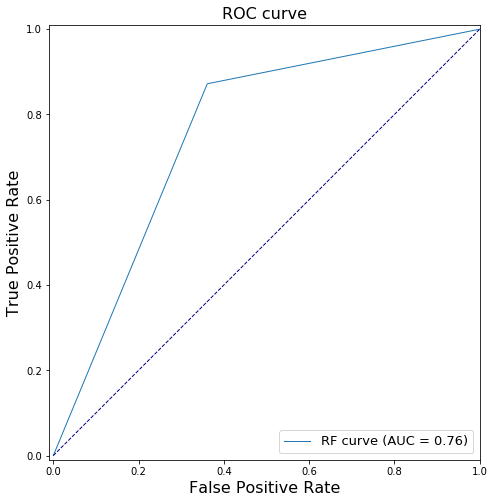

PCA Transformed - 11 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137]
[[ 546  307]
 [ 158 1115]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       853
           1       0.78      0.88      0.83      1273

    accuracy                           0.78      2126
   macro avg       0.78      0.76      0.76      2126
weighted avg       0.78      0.78      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


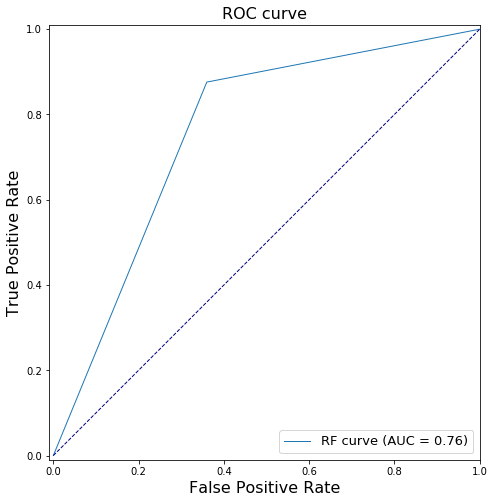

PCA Transformed - 12 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693]
[[ 555  298]
 [ 157 1116]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       853
           1       0.79      0.88      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.76      0.77      2126
weighted avg       0.79      0.79      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


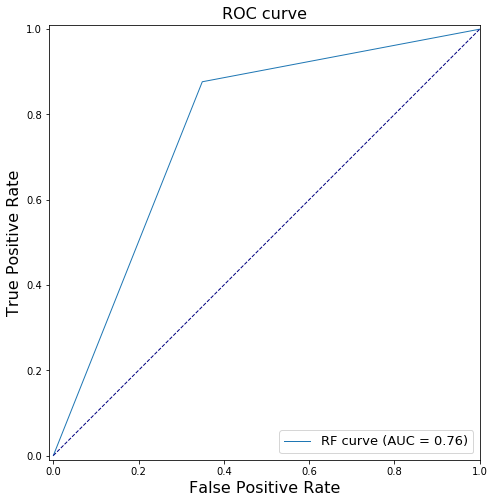

PCA Transformed - 13 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942]
[[ 546  307]
 [ 150 1123]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       853
           1       0.79      0.88      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.76      0.77      2126
weighted avg       0.78      0.79      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


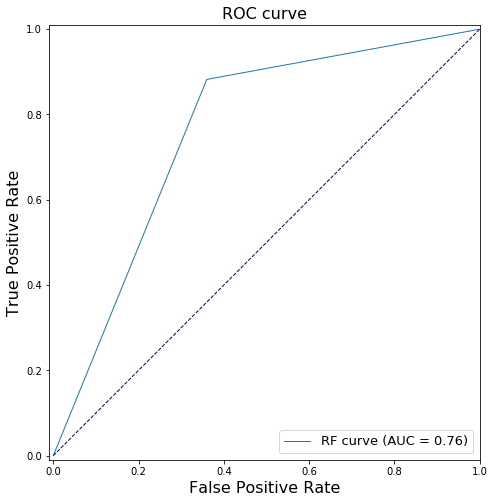

PCA Transformed - 14 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602 ]
[[ 557  296]
 [ 158 1115]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       853
           1       0.79      0.88      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.76      0.77      2126
weighted avg       0.79      0.79      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


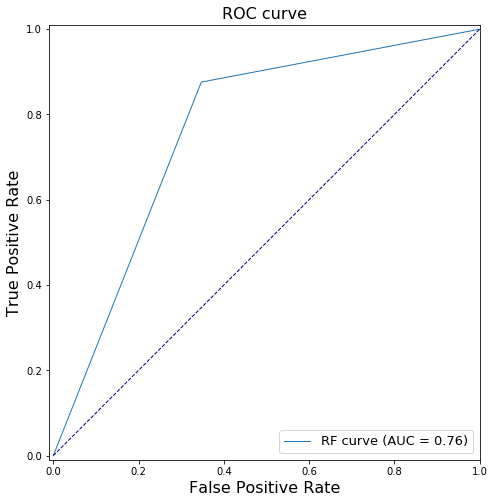

PCA Transformed - 15 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023  ]
[[ 581  272]
 [ 163 1110]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       853
           1       0.80      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


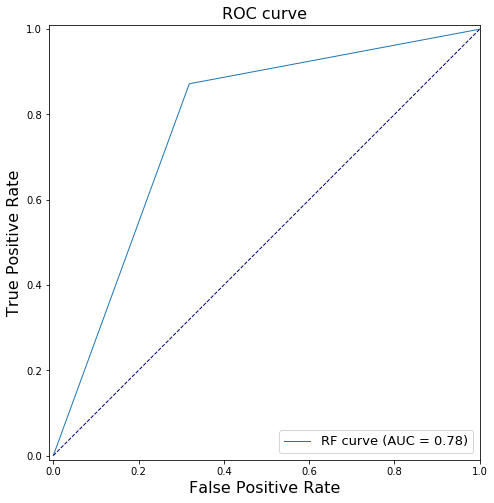

PCA Transformed - 16 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703]
[[ 588  265]
 [ 160 1113]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


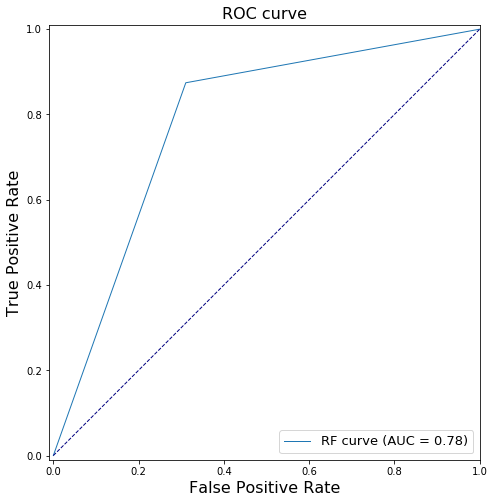

PCA Transformed - 17 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826]
[[ 582  271]
 [ 159 1114]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       853
           1       0.80      0.88      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.80      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


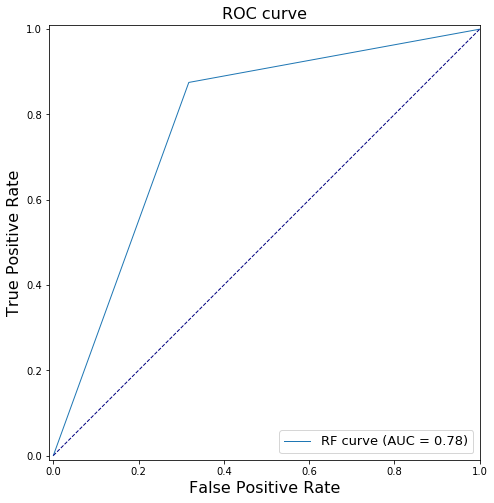

PCA Transformed - 18 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371]
[[ 582  271]
 [ 168 1105]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       853
           1       0.80      0.87      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


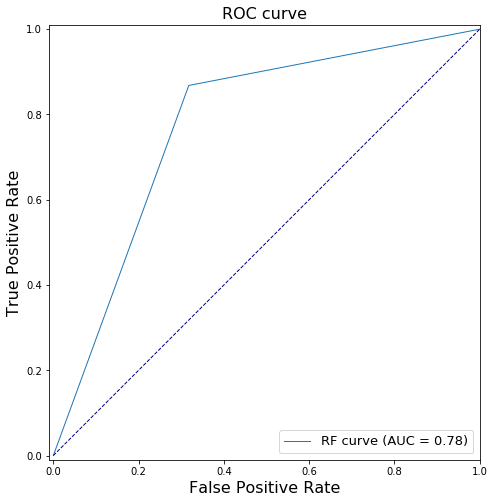

PCA Transformed - 19 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486]
[[ 591  262]
 [ 166 1107]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


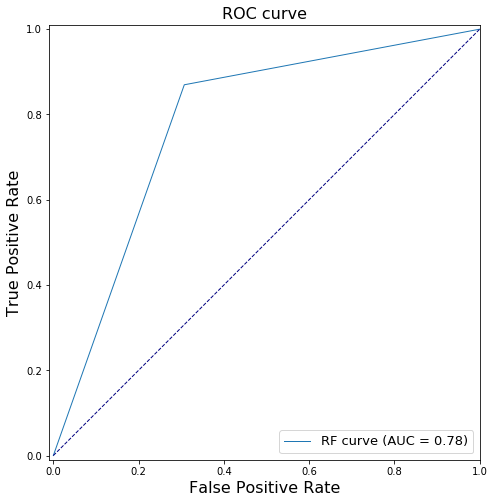

PCA Transformed - 20 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955]
[[ 584  269]
 [ 167 1106]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       853
           1       0.80      0.87      0.84      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


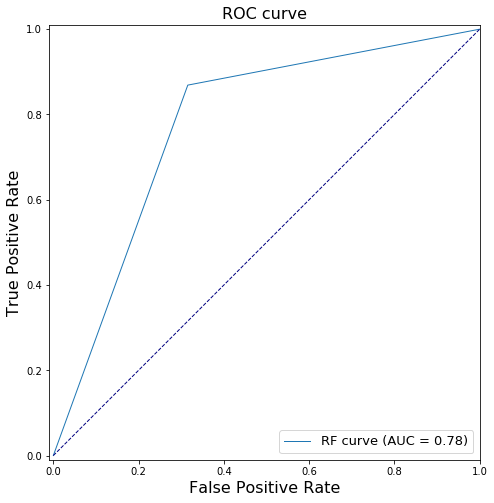

PCA Transformed - 21 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254]
[[ 583  270]
 [ 160 1113]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       853
           1       0.80      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.80      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


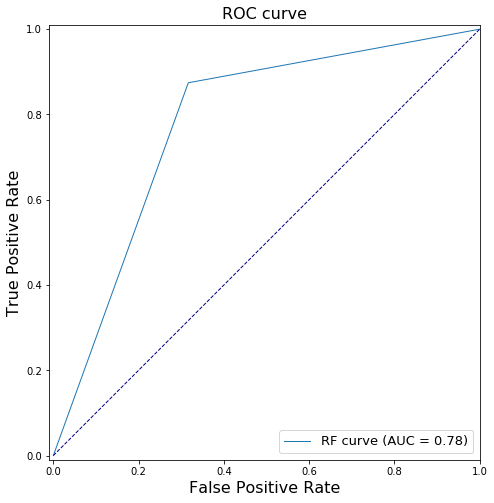

PCA Transformed - 22 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278 ]
[[ 578  275]
 [ 160 1113]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       853
           1       0.80      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


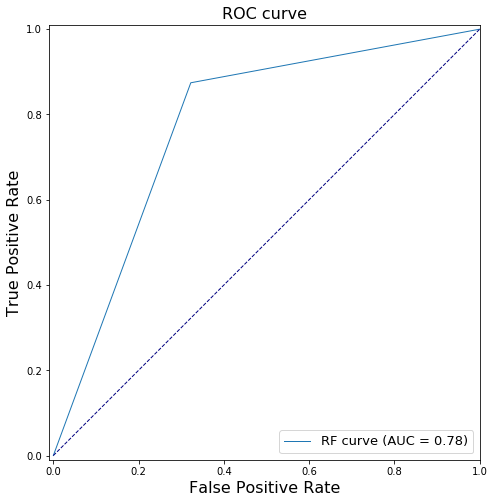

PCA Transformed - 23 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444  ]
[[ 585  268]
 [ 165 1108]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.80      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


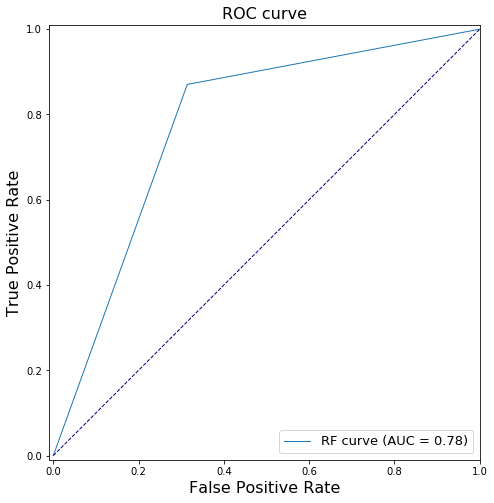

PCA Transformed - 24 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137]
[[ 581  272]
 [ 169 1104]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.87      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


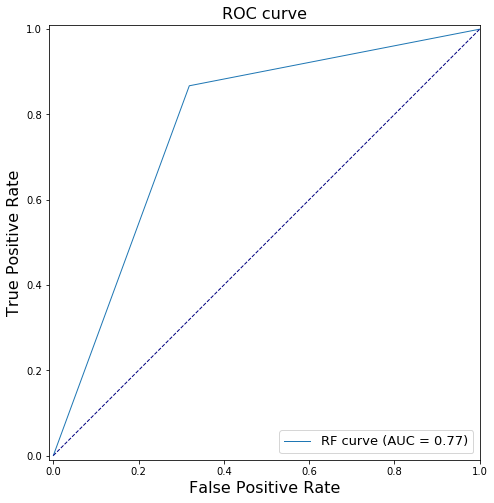

PCA Transformed - 25 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101]
[[ 593  260]
 [ 169 1104]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.73       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


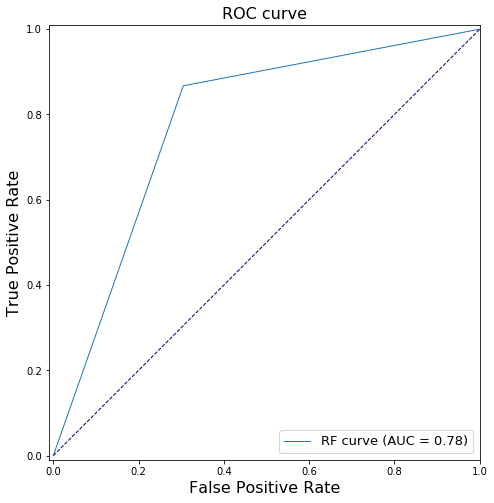

PCA Transformed - 26 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949]
[[ 597  256]
 [ 165 1108]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.79      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


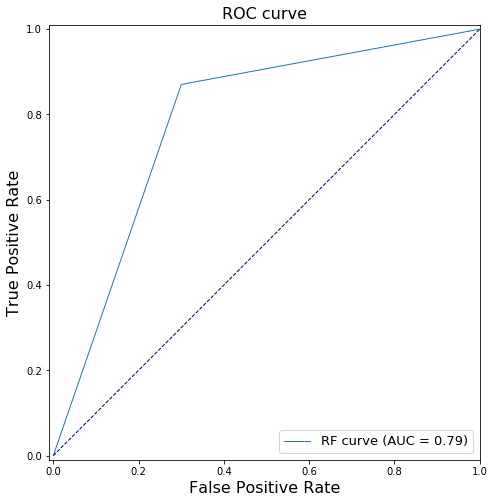

PCA Transformed - 27 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861]
[[ 590  263]
 [ 157 1116]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       853
           1       0.81      0.88      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


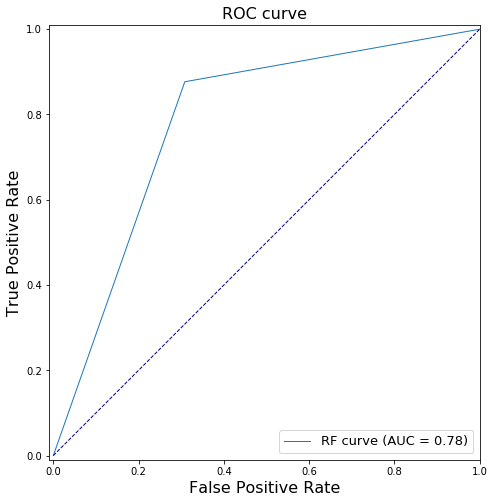

PCA Transformed - 28 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861  0.11334912]
[[ 579  274]
 [ 160 1113]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       853
           1       0.80      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


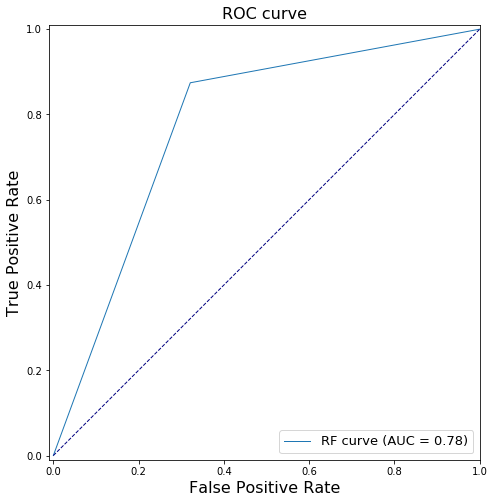

PCA Transformed - 29 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861  0.11334912  0.10527732]
[[ 589  264]
 [ 154 1119]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       853
           1       0.81      0.88      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


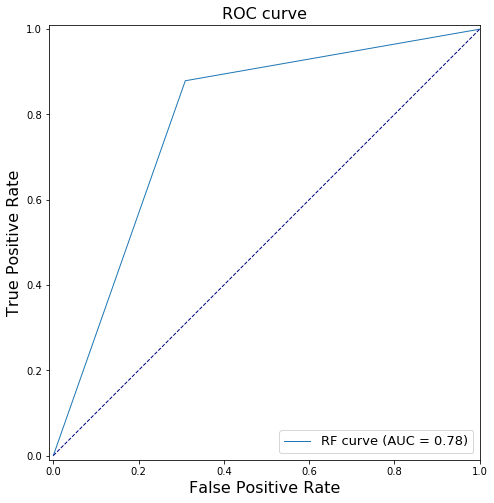

PCA Transformed - 30 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861  0.11334912  0.10527732  0.09267067]
[[ 591  262]
 [ 162 1111]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


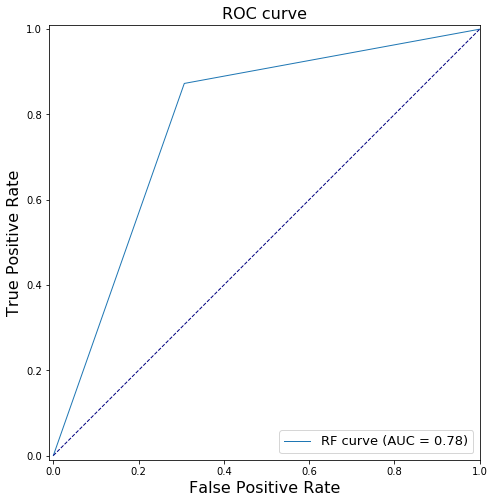

PCA Transformed - 31 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861  0.11334912  0.10527732  0.09267067
  0.08170555]
[[ 602  251]
 [ 158 1115]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       853
           1       0.82      0.88      0.85      1273

    accuracy                           0.81      2126
   macro avg       0.80      0.79      0.80      2126
weighted avg       0.81      0.81      0.81      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


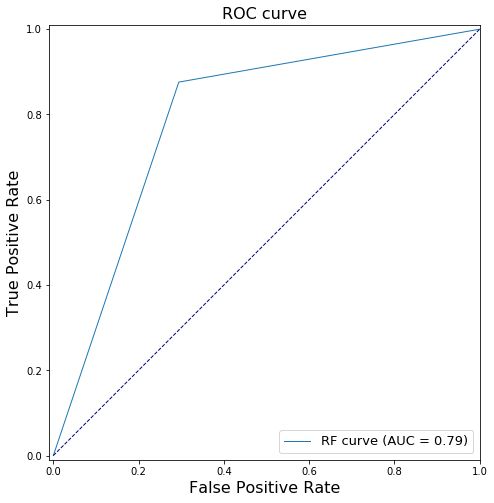

PCA Transformed - 32 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861  0.11334912  0.10527732  0.09267067
  0.08170555  0.06934786]
[[ 601  252]
 [ 157 1116]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75       853
           1       0.82      0.88      0.85      1273

    accuracy                           0.81      2126
   macro avg       0.80      0.79      0.80      2126
weighted avg       0.81      0.81      0.81      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


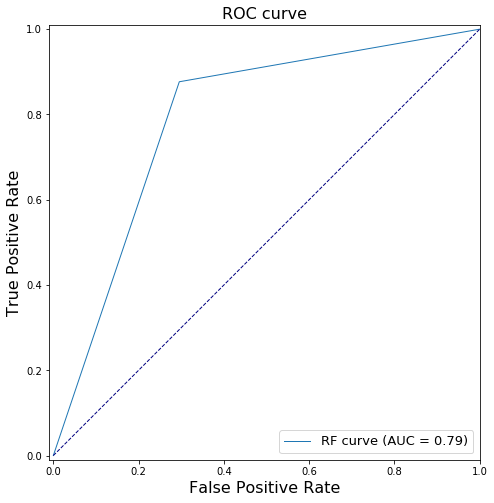

PCA Transformed - 33 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861  0.11334912  0.10527732  0.09267067
  0.08170555  0.06934786  0.05254736]
[[ 596  257]
 [ 158 1115]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       853
           1       0.81      0.88      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.79      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


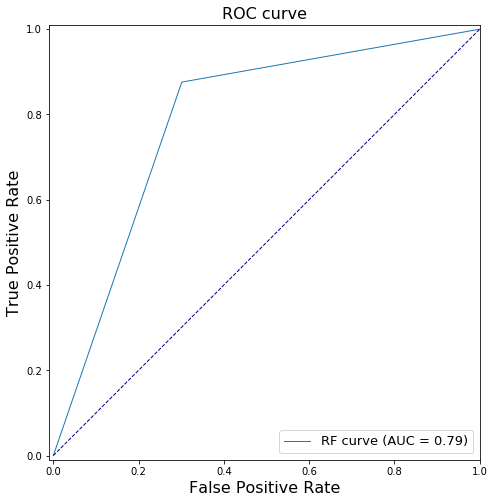

PCA Transformed - 34 dimensions is :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703  0.39309826  0.32993371
  0.31804486  0.26952955  0.25741254  0.2361278   0.234444    0.22350137
  0.18821101  0.17776949  0.13096861  0.11334912  0.10527732  0.09267067
  0.08170555  0.06934786  0.05254736  0.03884836]
[[ 599  254]
 [ 155 1118]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75       853
           1       0.81      0.88      0.85      1273

    accuracy                           0.81      2126
   macro avg       0.80      0.79      0.80      2126
weighted avg       0.81      0.81      0.81      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


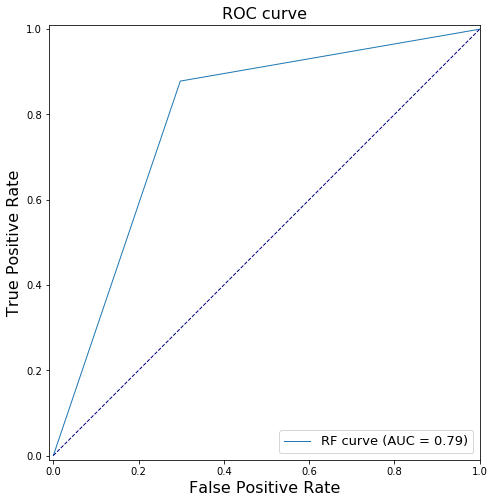

In [9]:
#Checking for best PCA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (2,35):
    pca = PCA(n_components=i,svd_solver='full')
    X_pca = pca.fit_transform(X)
    print("PCA Transformed - "+str(i)+ " dimensions is :-" )
    print(pca.explained_variance_)
    forest_test(X_pca, Y)

PCA Transformed Best is in 16 dimensions Resulting in :-
[18.88930475  7.89154936  5.33986728  3.63277089  3.24851682  2.54389546
  1.4518437   1.16006711  0.90918208  0.8162152   0.78719137  0.68640693
  0.64148942  0.5476602   0.440023    0.43315703]
[[ 592  261]
 [ 169 1104]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


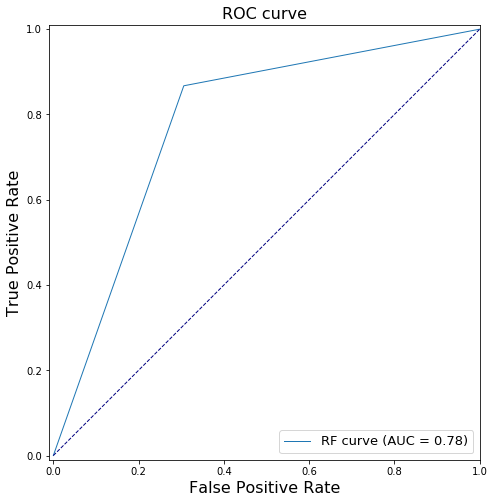

In [10]:
#Plotting Best PCA
pca = PCA(n_components=16,svd_solver='full')
X_pca = pca.fit_transform(X)
print("PCA Transformed Best is in 16 dimensions Resulting in :-" )
print(pca.explained_variance_)
forest_test(X_pca, Y)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7085 samples in 0.036s...
[t-SNE] Computed neighbors for 7085 samples in 4.915s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7085
[t-SNE] Computed conditional probabilities for sample 2000 / 7085
[t-SNE] Computed conditional probabilities for sample 3000 / 7085
[t-SNE] Computed conditional probabilities for sample 4000 / 7085
[t-SNE] Computed conditional probabilities for sample 5000 / 7085
[t-SNE] Computed conditional probabilities for sample 6000 / 7085
[t-SNE] Computed conditional probabilities for sample 7000 / 7085
[t-SNE] Computed conditional probabilities for sample 7085 / 7085
[t-SNE] Mean sigma: 1.216220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.046478
[t-SNE] KL divergence after 600 iterations: 1.481864
[[ 622  231]
 [ 197 1076]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       853
           1       0.82      0.85 

/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


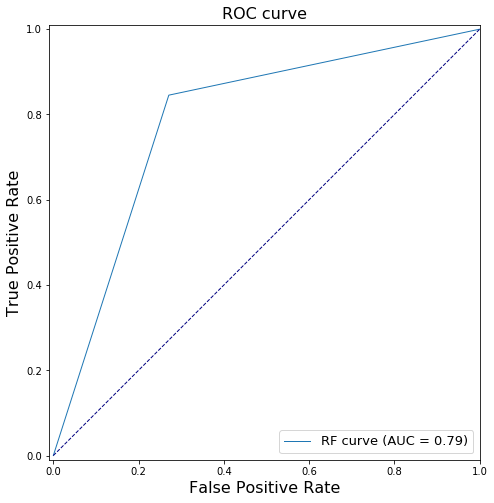

In [11]:
#tSNE dimension reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
X_tsne = tsne.fit_transform(X)
forest_test(X_tsne, Y)

Base Non-Tranformed data
[[ 588  265]
 [ 132 1141]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       853
           1       0.81      0.90      0.85      1273

    accuracy                           0.81      2126
   macro avg       0.81      0.79      0.80      2126
weighted avg       0.81      0.81      0.81      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


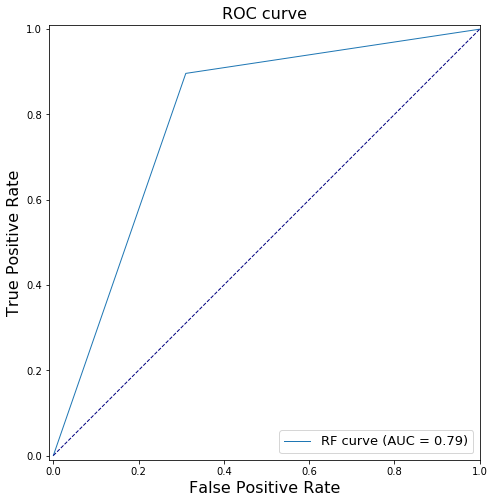

LLE Transformed - 1 dimensions is :-
[[ 516  337]
 [ 231 1042]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.65       853
           1       0.76      0.82      0.79      1273

    accuracy                           0.73      2126
   macro avg       0.72      0.71      0.72      2126
weighted avg       0.73      0.73      0.73      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


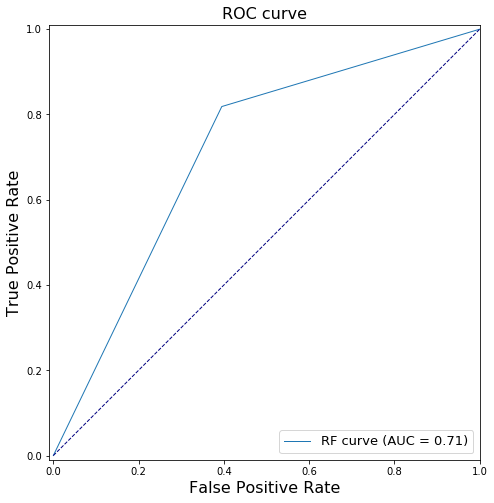

LLE Transformed - 2 dimensions is :-
[[ 526  327]
 [ 236 1037]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       853
           1       0.76      0.81      0.79      1273

    accuracy                           0.74      2126
   macro avg       0.73      0.72      0.72      2126
weighted avg       0.73      0.74      0.73      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


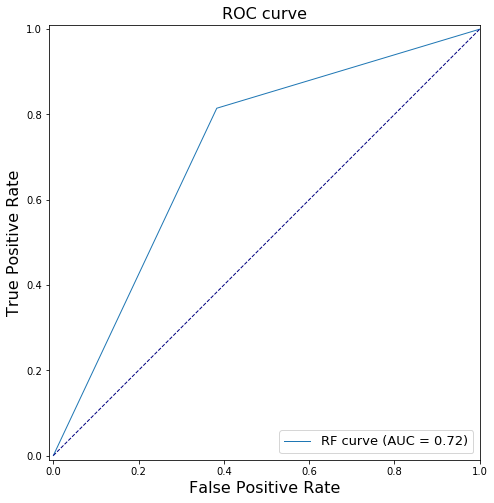

LLE Transformed - 3 dimensions is :-
[[ 524  329]
 [ 212 1061]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       853
           1       0.76      0.83      0.80      1273

    accuracy                           0.75      2126
   macro avg       0.74      0.72      0.73      2126
weighted avg       0.74      0.75      0.74      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


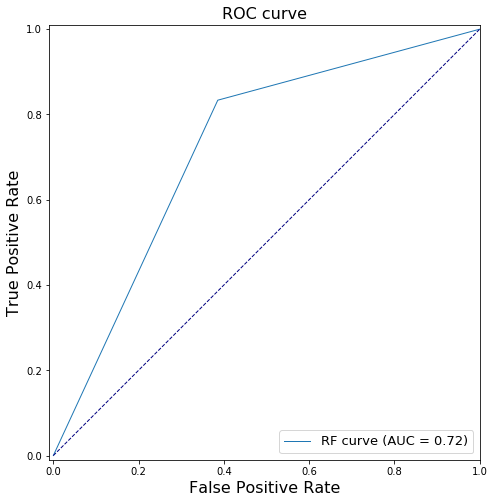

LLE Transformed - 4 dimensions is :-
[[ 519  334]
 [ 204 1069]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       853
           1       0.76      0.84      0.80      1273

    accuracy                           0.75      2126
   macro avg       0.74      0.72      0.73      2126
weighted avg       0.74      0.75      0.74      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


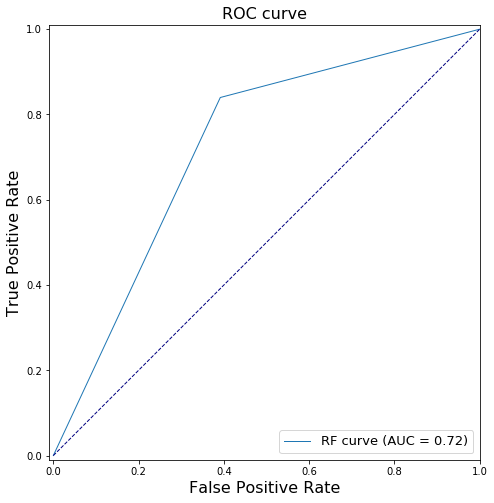

LLE Transformed - 5 dimensions is :-
[[ 522  331]
 [ 206 1067]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       853
           1       0.76      0.84      0.80      1273

    accuracy                           0.75      2126
   macro avg       0.74      0.73      0.73      2126
weighted avg       0.74      0.75      0.74      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


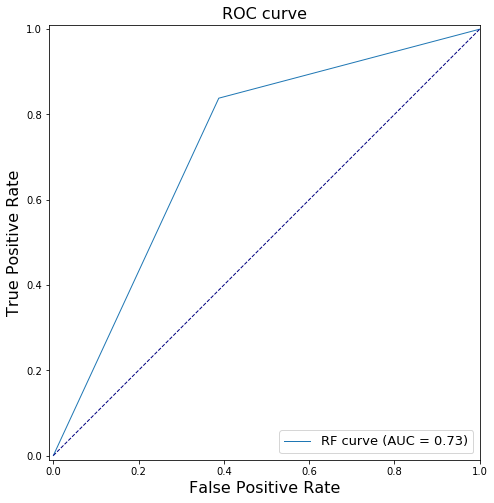

LLE Transformed - 6 dimensions is :-
[[ 520  333]
 [ 203 1070]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       853
           1       0.76      0.84      0.80      1273

    accuracy                           0.75      2126
   macro avg       0.74      0.73      0.73      2126
weighted avg       0.75      0.75      0.74      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


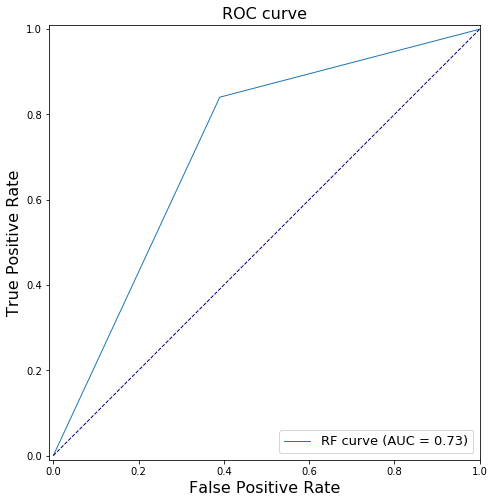

LLE Transformed - 7 dimensions is :-
[[ 530  323]
 [ 223 1050]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       853
           1       0.76      0.82      0.79      1273

    accuracy                           0.74      2126
   macro avg       0.73      0.72      0.73      2126
weighted avg       0.74      0.74      0.74      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


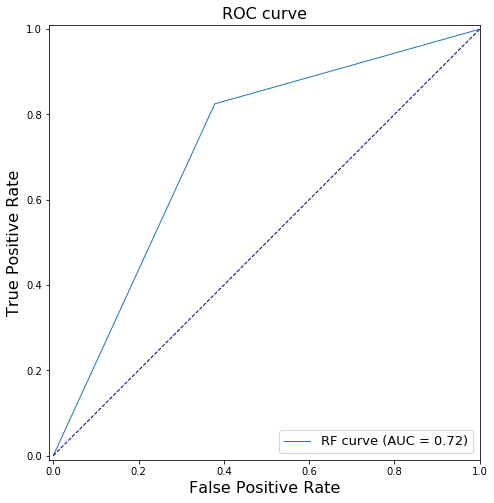

LLE Transformed - 8 dimensions is :-
[[ 495  358]
 [ 217 1056]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       853
           1       0.75      0.83      0.79      1273

    accuracy                           0.73      2126
   macro avg       0.72      0.70      0.71      2126
weighted avg       0.73      0.73      0.72      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


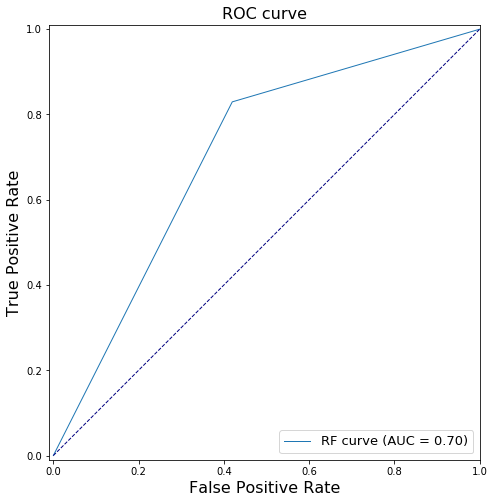

LLE Transformed - 9 dimensions is :-
[[ 576  277]
 [ 187 1086]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       853
           1       0.80      0.85      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.78      0.76      0.77      2126
weighted avg       0.78      0.78      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


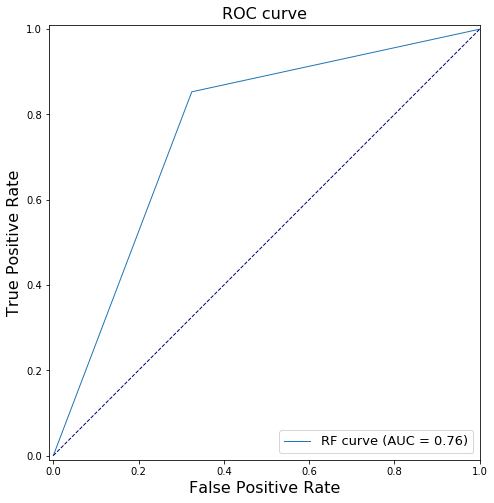

LLE Transformed - 10 dimensions is :-
[[ 576  277]
 [ 174 1099]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.77      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


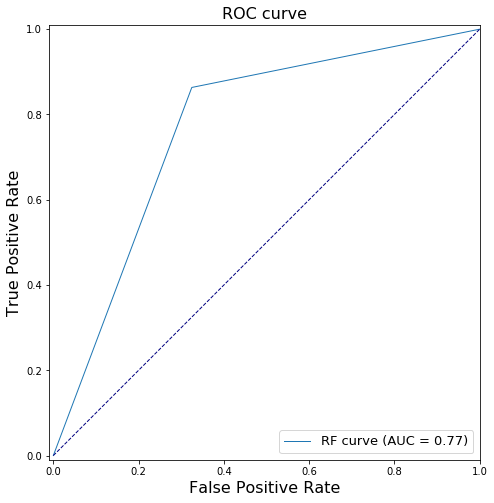

LLE Transformed - 11 dimensions is :-
[[ 572  281]
 [ 194 1079]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       853
           1       0.79      0.85      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.77      0.76      0.76      2126
weighted avg       0.77      0.78      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


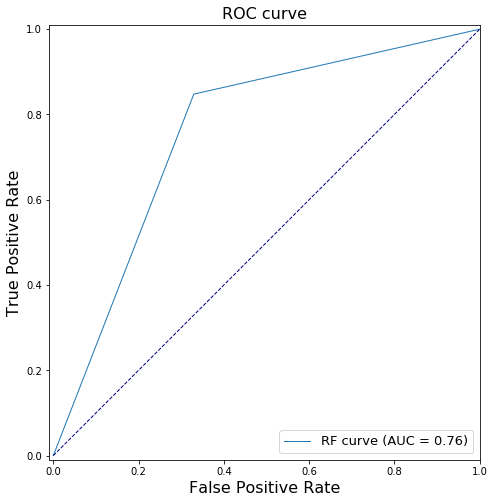

LLE Transformed - 12 dimensions is :-
[[ 571  282]
 [ 187 1086]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       853
           1       0.79      0.85      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.77      0.76      0.77      2126
weighted avg       0.78      0.78      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


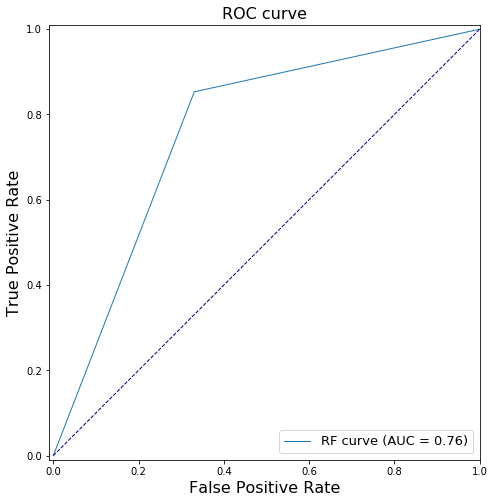

LLE Transformed - 13 dimensions is :-
[[ 576  277]
 [ 178 1095]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.77      2126
weighted avg       0.78      0.79      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


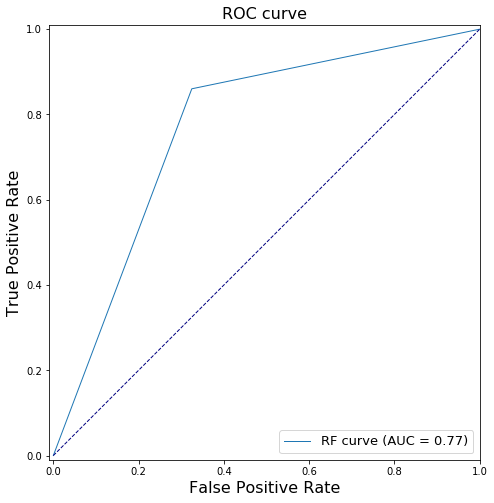

LLE Transformed - 14 dimensions is :-
[[ 573  280]
 [ 182 1091]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.78      2126
   macro avg       0.78      0.76      0.77      2126
weighted avg       0.78      0.78      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


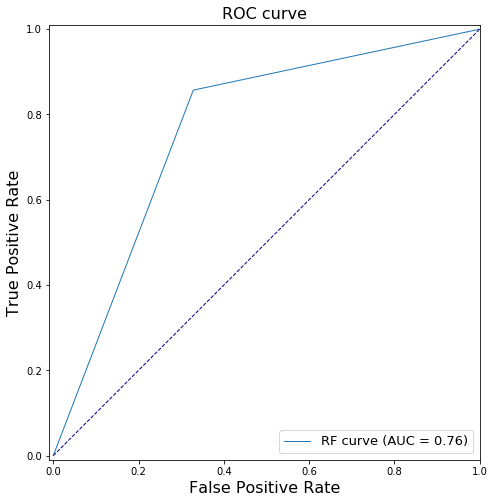

LLE Transformed - 15 dimensions is :-
[[ 572  281]
 [ 174 1099]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.77      2126
weighted avg       0.78      0.79      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


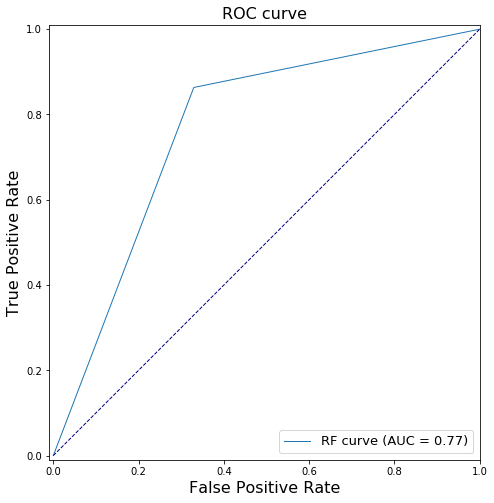

LLE Transformed - 16 dimensions is :-
[[ 579  274]
 [ 172 1101]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


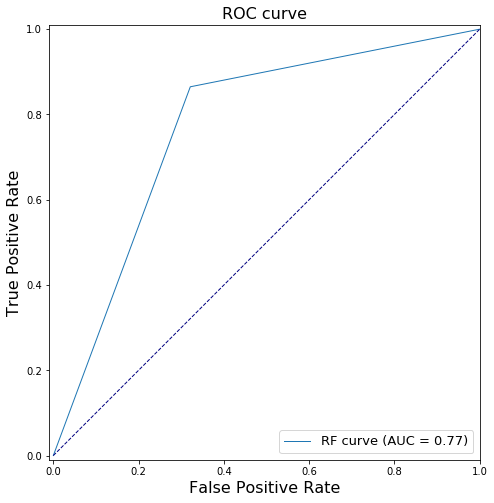

LLE Transformed - 17 dimensions is :-
[[ 573  280]
 [ 171 1102]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       853
           1       0.80      0.87      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.77      2126
weighted avg       0.79      0.79      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


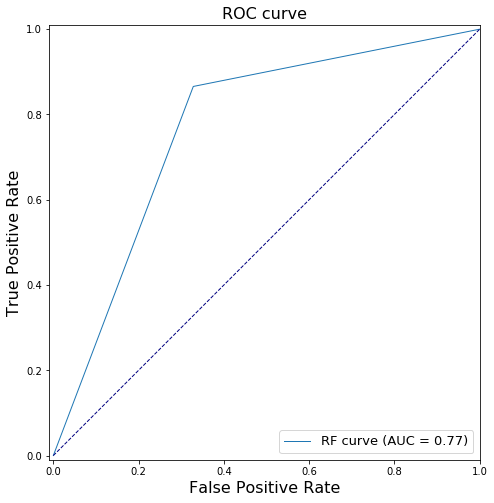

LLE Transformed - 18 dimensions is :-
[[ 575  278]
 [ 172 1101]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.77      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


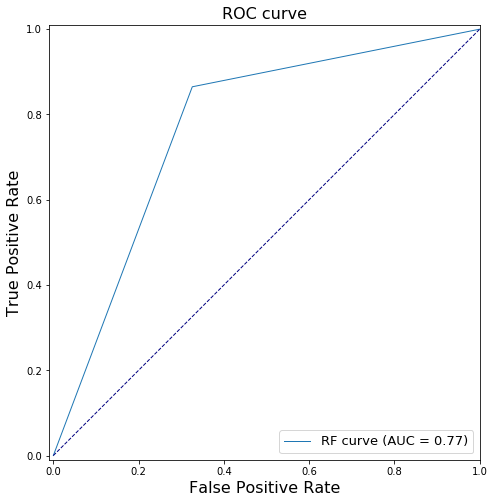

LLE Transformed - 19 dimensions is :-
[[ 583  270]
 [ 179 1094]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


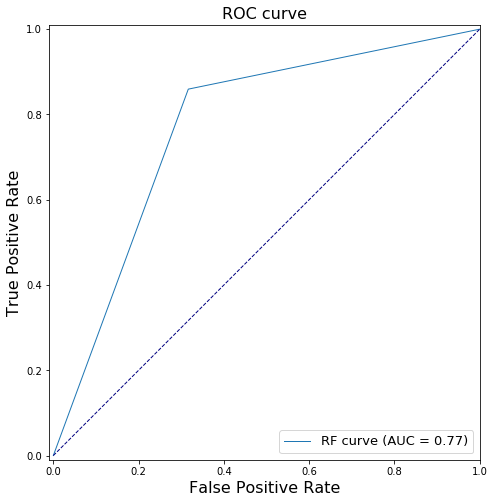

LLE Transformed - 20 dimensions is :-
[[ 587  266]
 [ 183 1090]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


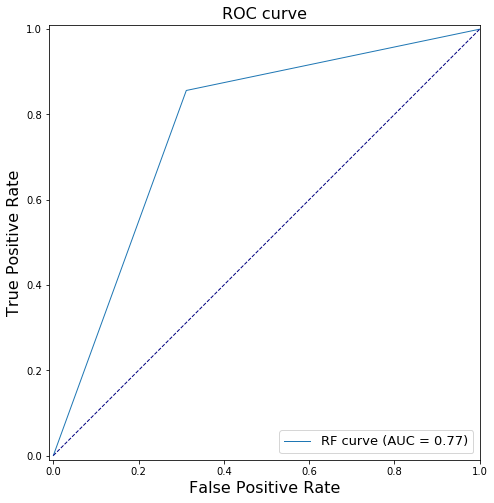

LLE Transformed - 21 dimensions is :-
[[ 568  285]
 [ 173 1100]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71       853
           1       0.79      0.86      0.83      1273

    accuracy                           0.78      2126
   macro avg       0.78      0.76      0.77      2126
weighted avg       0.78      0.78      0.78      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


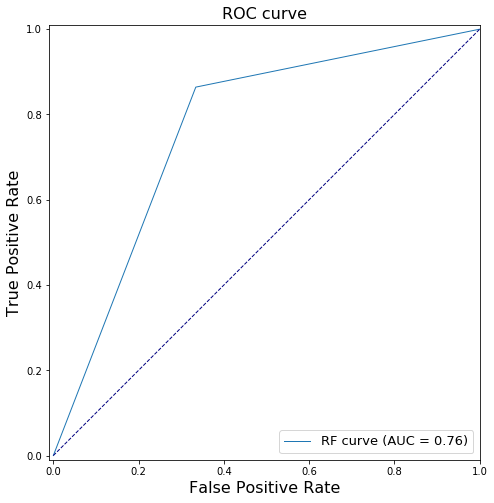

LLE Transformed - 22 dimensions is :-
[[ 578  275]
 [ 174 1099]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


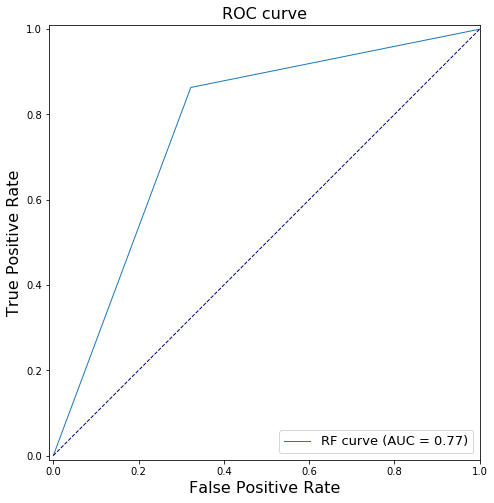

LLE Transformed - 23 dimensions is :-
[[ 584  269]
 [ 178 1095]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


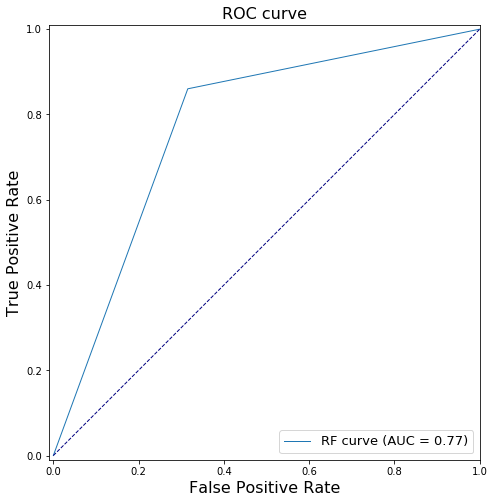

LLE Transformed - 24 dimensions is :-
[[ 597  256]
 [ 180 1093]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


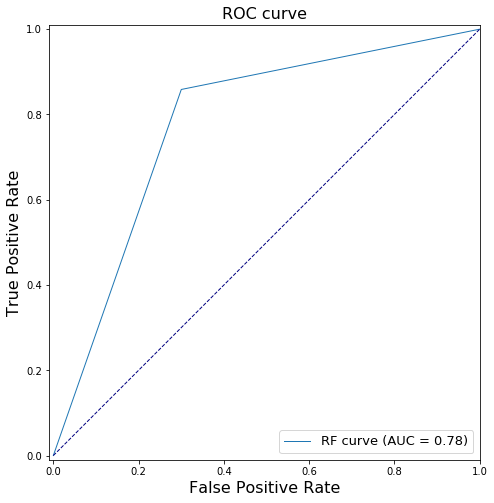

LLE Transformed - 25 dimensions is :-
[[ 592  261]
 [ 179 1094]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


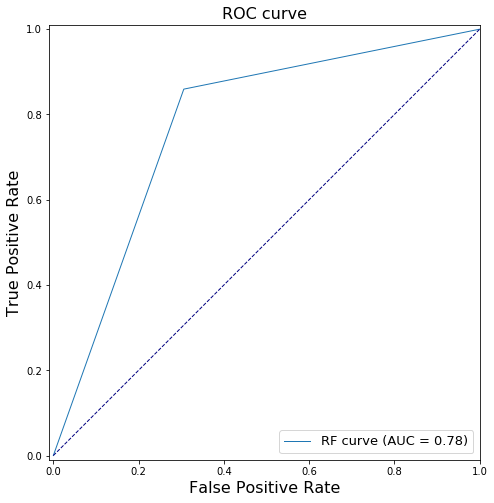

LLE Transformed - 26 dimensions is :-
[[ 583  270]
 [ 175 1098]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


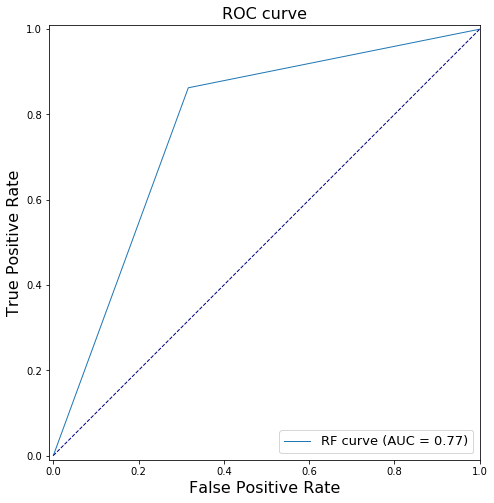

LLE Transformed - 27 dimensions is :-
[[ 582  271]
 [ 177 1096]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       853
           1       0.80      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


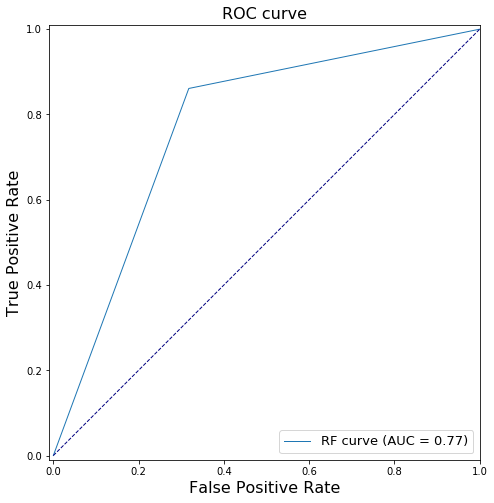

LLE Transformed - 28 dimensions is :-
[[ 591  262]
 [ 182 1091]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


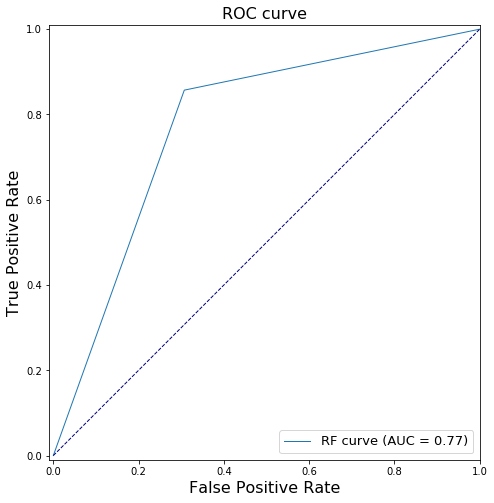

LLE Transformed - 29 dimensions is :-
[[ 591  262]
 [ 172 1101]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       853
           1       0.81      0.86      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


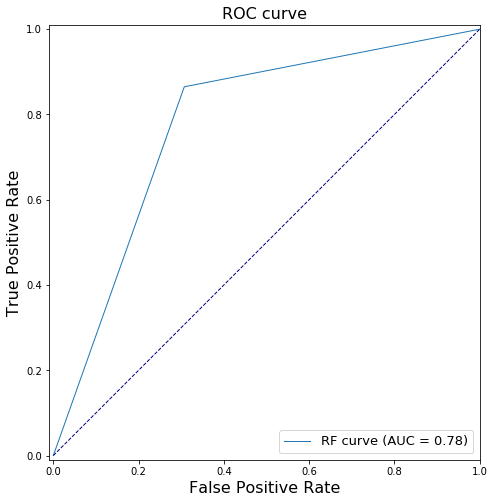

In [12]:
#Checking for best LLE dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (1,30):
    embedding = LocallyLinearEmbedding(n_components=i)

# run an LLE and use it to transform the features
    X_lle = embedding.fit_transform(X)
    print("LLE Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_lle, Y)

Best performing LLE Transformed - is in 25 dimensions:-
[[ 591  262]
 [ 181 1092]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


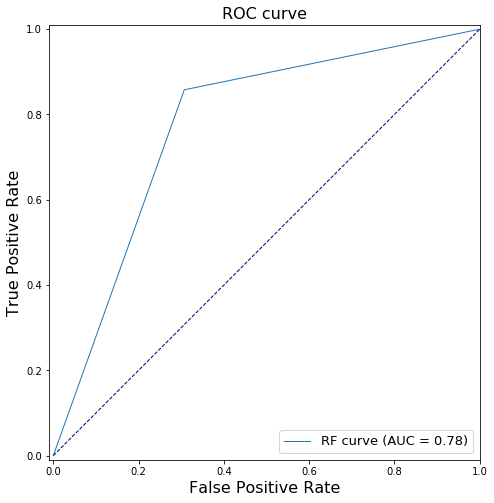

In [13]:
#Plotting Best LLE
embedding = LocallyLinearEmbedding(n_components=25)
X_lle = embedding.fit_transform(X)
print("Best performing LLE Transformed - is in 25 dimensions:-" )
forest_test(X_lle, Y)

LDA Transformed Best is in 1 dimensions is :-
[[542 311]
 [330 943]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       853
           1       0.75      0.74      0.75      1273

    accuracy                           0.70      2126
   macro avg       0.69      0.69      0.69      2126
weighted avg       0.70      0.70      0.70      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


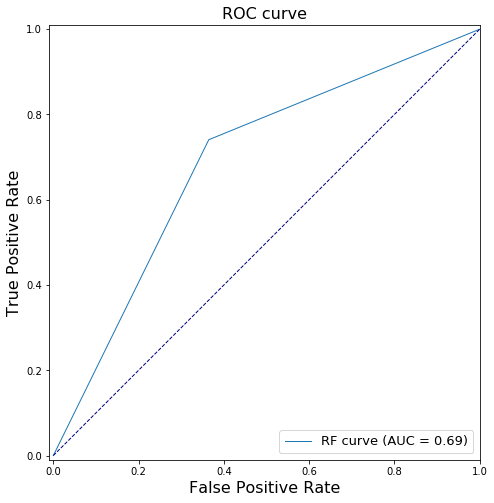

In [18]:
#Plotting Best LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, Y).transform(X)
print("LDA Transformed Best is in 1 dimensions is :-" )
forest_test(X_lda, Y)

Base Non-Tranformed data
[[ 597  256]
 [ 130 1143]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       853
           1       0.82      0.90      0.86      1273

    accuracy                           0.82      2126
   macro avg       0.82      0.80      0.81      2126
weighted avg       0.82      0.82      0.82      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


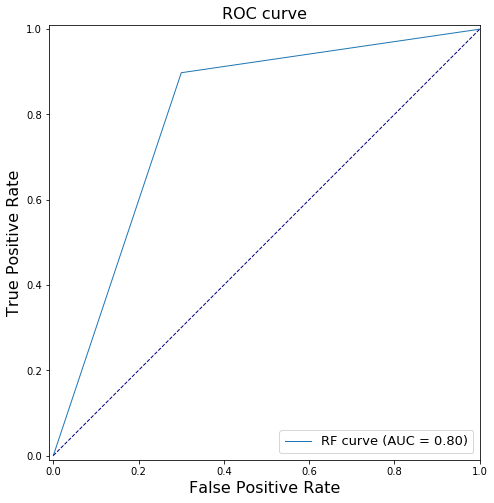

ICA Transformed - 3 dimensions is :-
[[ 510  343]
 [ 263 1010]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       853
           1       0.75      0.79      0.77      1273

    accuracy                           0.71      2126
   macro avg       0.70      0.70      0.70      2126
weighted avg       0.71      0.71      0.71      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


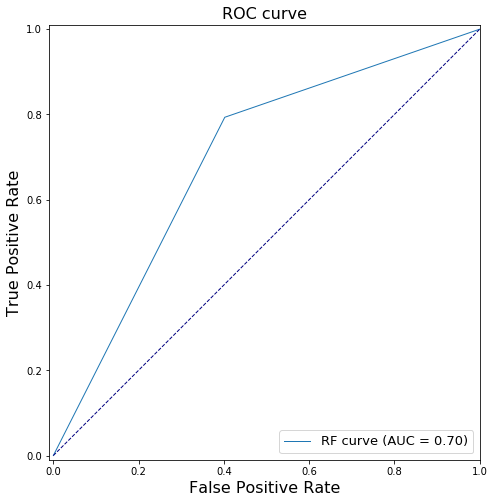

ICA Transformed - 4 dimensions is :-
[[ 500  353]
 [ 217 1056]]
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       853
           1       0.75      0.83      0.79      1273

    accuracy                           0.73      2126
   macro avg       0.72      0.71      0.71      2126
weighted avg       0.73      0.73      0.73      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


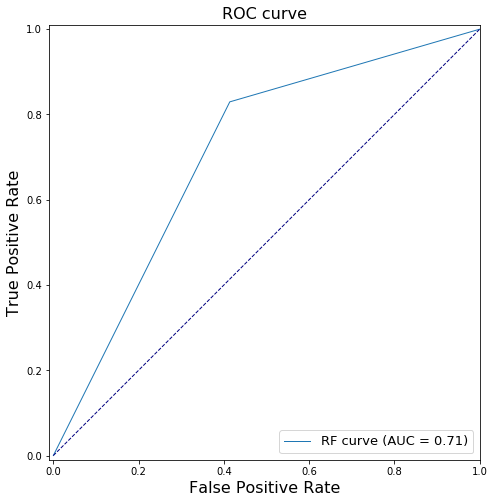

ICA Transformed - 5 dimensions is :-
[[ 539  314]
 [ 203 1070]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       853
           1       0.77      0.84      0.81      1273

    accuracy                           0.76      2126
   macro avg       0.75      0.74      0.74      2126
weighted avg       0.75      0.76      0.75      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


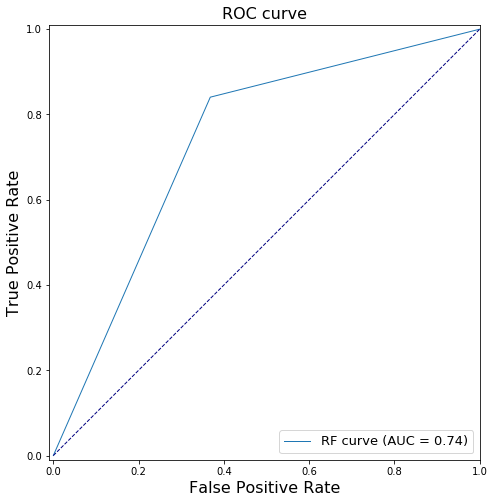

ICA Transformed - 6 dimensions is :-
[[ 520  333]
 [ 168 1105]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.67       853
           1       0.77      0.87      0.82      1273

    accuracy                           0.76      2126
   macro avg       0.76      0.74      0.75      2126
weighted avg       0.76      0.76      0.76      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


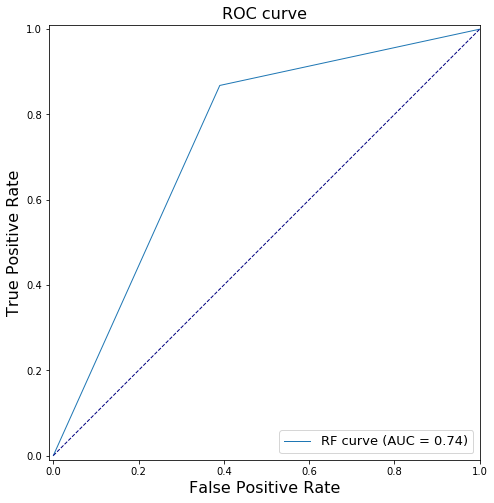

ICA Transformed - 7 dimensions is :-
[[ 533  320]
 [ 170 1103]]
              precision    recall  f1-score   support

           0       0.76      0.62      0.69       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.77      2126
   macro avg       0.77      0.75      0.75      2126
weighted avg       0.77      0.77      0.76      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


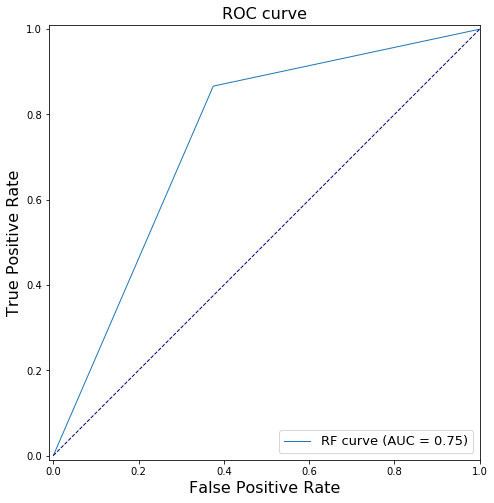

ICA Transformed - 8 dimensions is :-
[[ 525  328]
 [ 161 1112]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.68       853
           1       0.77      0.87      0.82      1273

    accuracy                           0.77      2126
   macro avg       0.77      0.74      0.75      2126
weighted avg       0.77      0.77      0.76      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


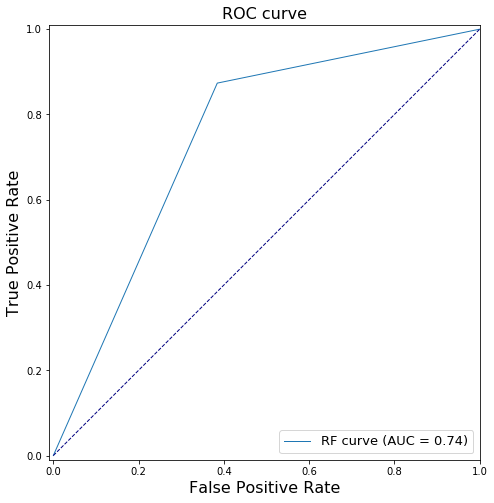

ICA Transformed - 9 dimensions is :-
[[ 533  320]
 [ 176 1097]]
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       853
           1       0.77      0.86      0.82      1273

    accuracy                           0.77      2126
   macro avg       0.76      0.74      0.75      2126
weighted avg       0.77      0.77      0.76      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


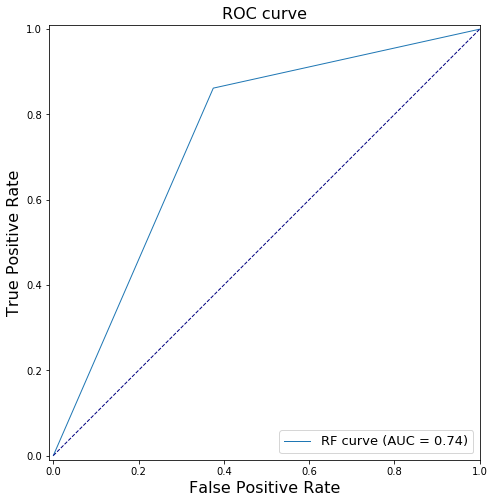

ICA Transformed - 10 dimensions is :-
[[ 536  317]
 [ 160 1113]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.77      0.75      0.76      2126
weighted avg       0.78      0.78      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


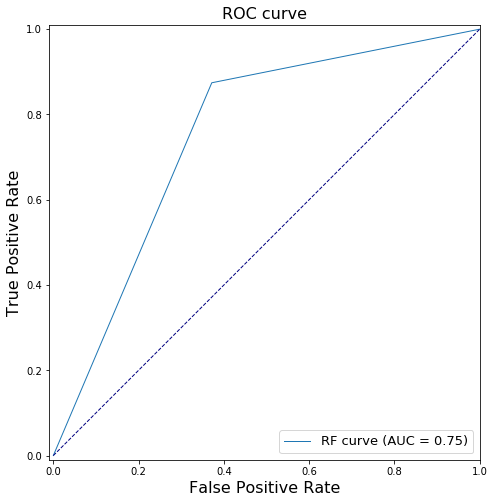

ICA Transformed - 11 dimensions is :-
[[ 544  309]
 [ 166 1107]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.77      0.75      0.76      2126
weighted avg       0.78      0.78      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


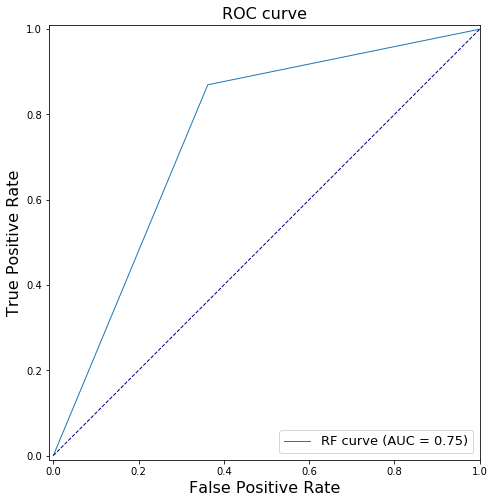

ICA Transformed - 12 dimensions is :-
[[ 538  315]
 [ 167 1106]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.77      2126
   macro avg       0.77      0.75      0.76      2126
weighted avg       0.77      0.77      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


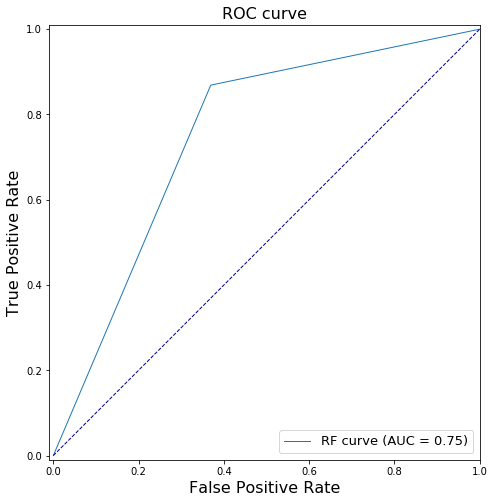

ICA Transformed - 13 dimensions is :-
[[ 546  307]
 [ 168 1105]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       853
           1       0.78      0.87      0.82      1273

    accuracy                           0.78      2126
   macro avg       0.77      0.75      0.76      2126
weighted avg       0.78      0.78      0.77      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


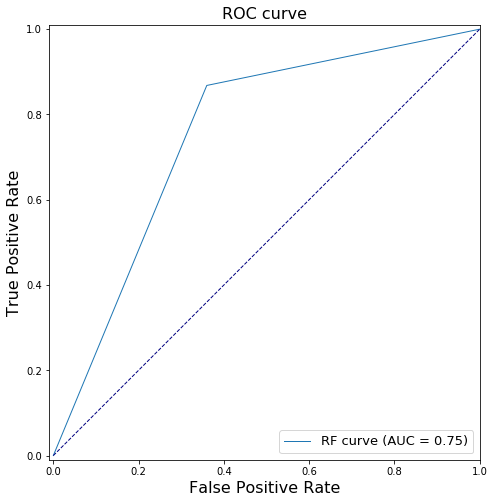

ICA Transformed - 14 dimensions is :-
[[ 599  254]
 [ 170 1103]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


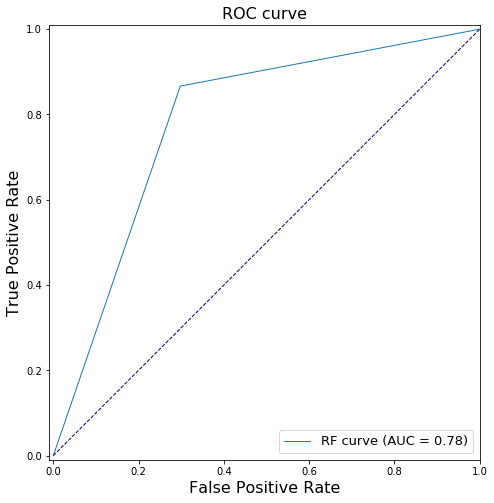

ICA Transformed - 15 dimensions is :-
[[ 590  263]
 [ 185 1088]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       853
           1       0.81      0.85      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.77      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


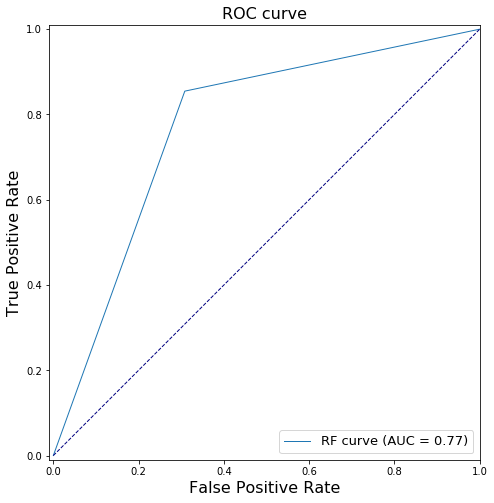

ICA Transformed - 16 dimensions is :-
[[ 594  259]
 [ 179 1094]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


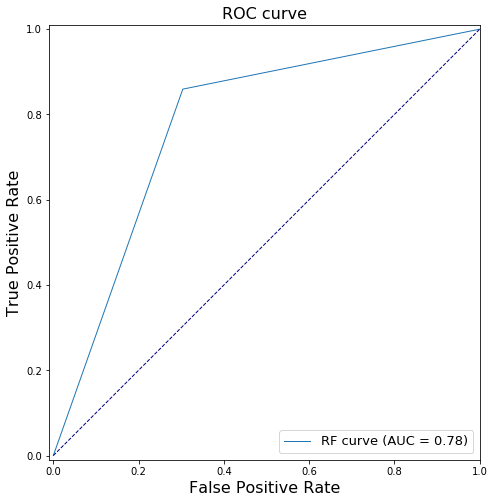

ICA Transformed - 17 dimensions is :-
[[ 598  255]
 [ 169 1104]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


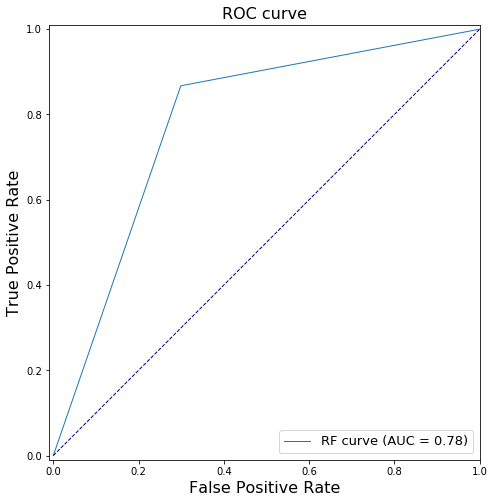

ICA Transformed - 18 dimensions is :-
[[ 601  252]
 [ 162 1111]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       853
           1       0.82      0.87      0.84      1273

    accuracy                           0.81      2126
   macro avg       0.80      0.79      0.79      2126
weighted avg       0.80      0.81      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


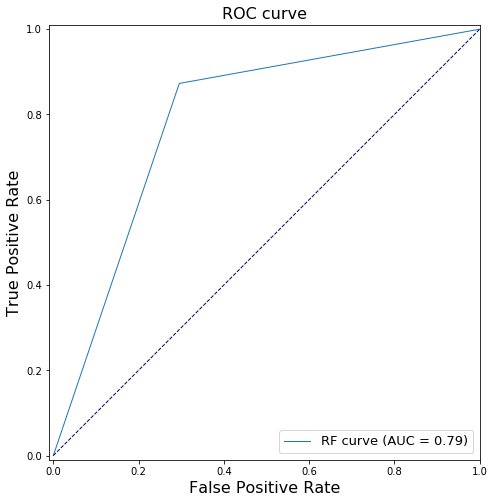

ICA Transformed - 19 dimensions is :-
[[ 596  257]
 [ 162 1111]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       853
           1       0.81      0.87      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.79      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


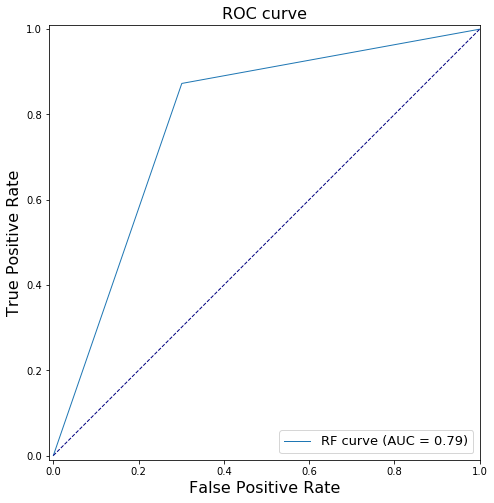

ICA Transformed - 20 dimensions is :-
[[ 614  239]
 [ 188 1085]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       853
           1       0.82      0.85      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.79      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


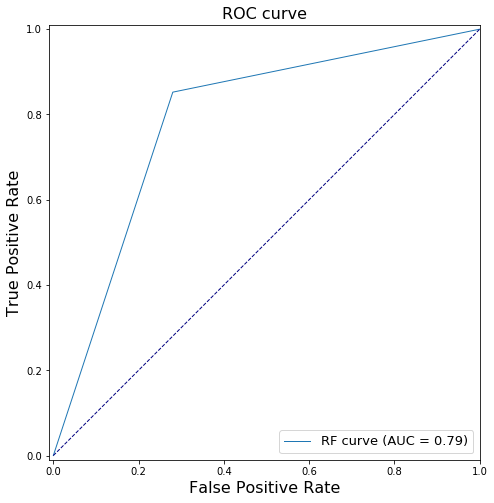

ICA Transformed - 21 dimensions is :-
[[ 596  257]
 [ 178 1095]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


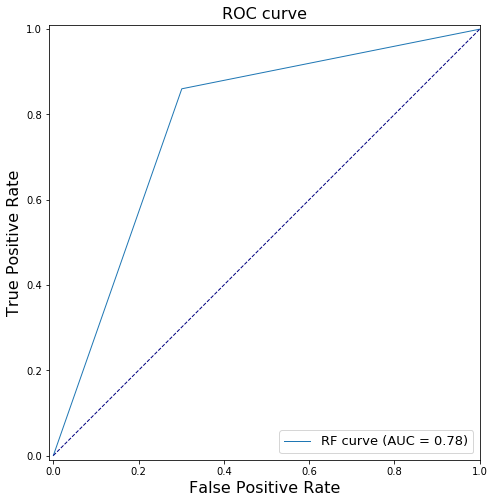

ICA Transformed - 22 dimensions is :-
[[ 598  255]
 [ 185 1088]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       853
           1       0.81      0.85      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


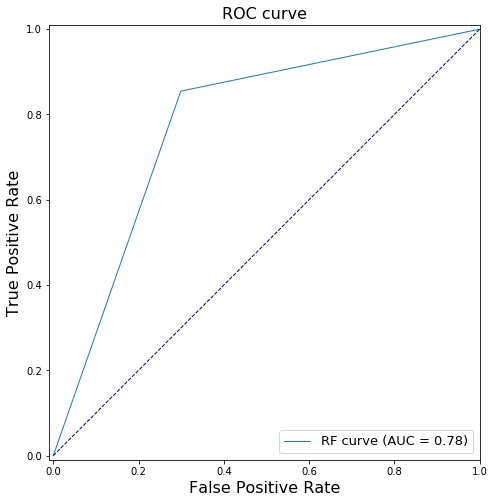

ICA Transformed - 23 dimensions is :-
[[ 600  253]
 [ 184 1089]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


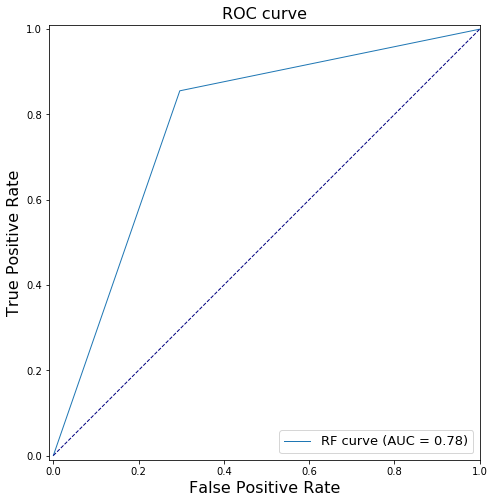

ICA Transformed - 24 dimensions is :-
[[ 594  259]
 [ 182 1091]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


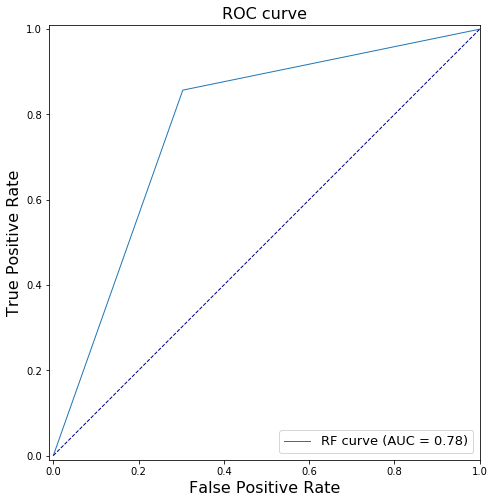

ICA Transformed - 25 dimensions is :-
[[ 597  256]
 [ 178 1095]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       853
           1       0.81      0.86      0.83      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.78      2126
weighted avg       0.79      0.80      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


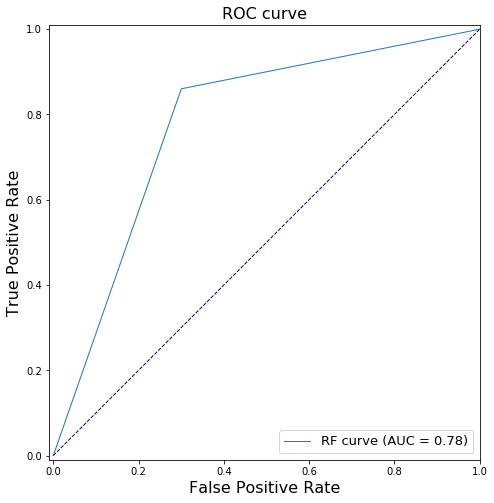

ICA Transformed - 26 dimensions is :-
[[ 604  249]
 [ 177 1096]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       853
           1       0.81      0.86      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


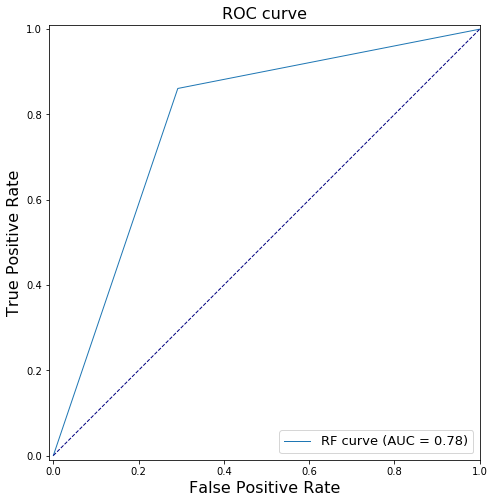

ICA Transformed - 27 dimensions is :-
[[ 607  246]
 [ 183 1090]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       853
           1       0.82      0.86      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.78      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


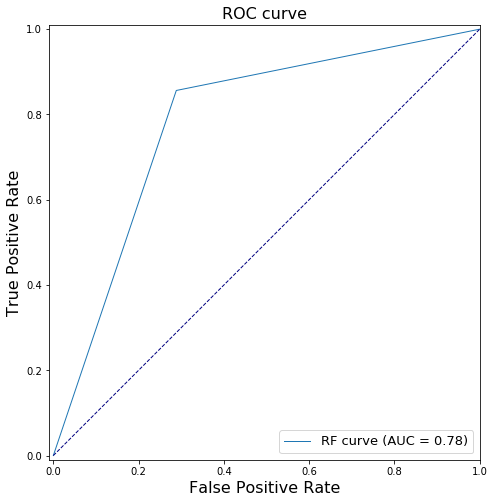

ICA Transformed - 28 dimensions is :-
[[ 608  245]
 [ 177 1096]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       853
           1       0.82      0.86      0.84      1273

    accuracy                           0.80      2126
   macro avg       0.80      0.79      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


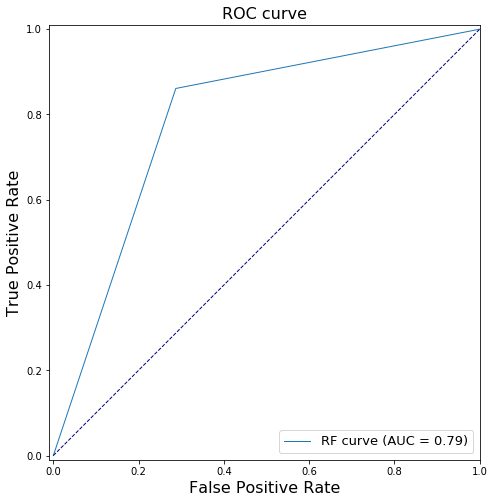

ICA Transformed - 29 dimensions is :-
[[ 597  256]
 [ 188 1085]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       853
           1       0.81      0.85      0.83      1273

    accuracy                           0.79      2126
   macro avg       0.78      0.78      0.78      2126
weighted avg       0.79      0.79      0.79      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


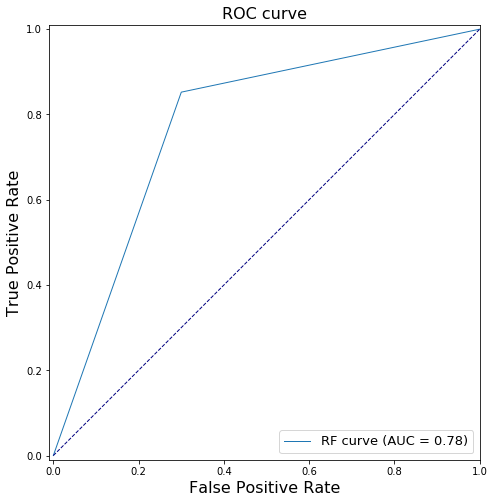

In [15]:
#Checking for best ICA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (3,30):
    ica = FastICA(n_components=i)
    X_ica = ica.fit_transform(X)
    print("ICA Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_ica, Y)

Best ICA Transformed in 18 dimensions is :-
[[ 614  239]
 [ 190 1083]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       853
           1       0.82      0.85      0.83      1273

    accuracy                           0.80      2126
   macro avg       0.79      0.79      0.79      2126
weighted avg       0.80      0.80      0.80      2126



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


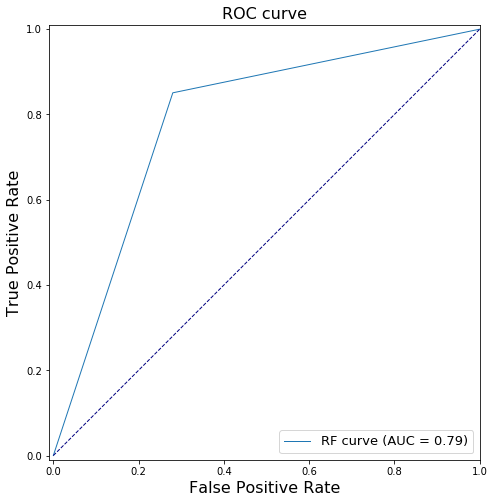

In [19]:
#Plotting Best ICA
ica = FastICA(n_components=18)
X_ica = ica.fit_transform(X)
print("Best ICA Transformed in 18 dimensions is :-" )
forest_test(X_ica, Y)